In [1]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [16]:
% matplotlib inline

# Load Data

In [104]:
df = pd.read_csv('/Users/mankshgupta/Desktop/EDAV_Dream_Team-master/data/billboard-spotify.csv')

# Explicit Music over time

In [64]:
explicit = df.groupby('year')['explicit'].sum()

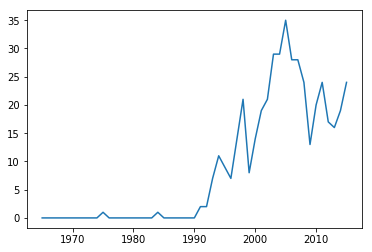

In [65]:
plt.plot(explicit)

# Artist Racial Diversity

In [44]:
top_artists = df.groupby('rank').get_group(1)[['year','artist']]

In [46]:
top_artists2 = df.groupby('rank').get_group(2)[['year','artist']]

In [48]:
top_artists2.columns = ['year','artist2']

In [54]:
top2 = top_artists.join(top_artists2.set_index('year'), on='year')

In [66]:
top2.head()

,year,artist,artist2
0,1965,sam the sham and the pharaohs,four tops
100,1966,ssgt barry sadler,the association
200,1967,lulu,the box tops
300,1968,the beatles,paul mauriat
400,1969,the archies,the 5th dimension


# Time signature analysis

In [105]:
df.head()

,rank,song,artist,year,lyrics,acousticness,danceability,duration_ms,energy,explicit,...,mode,popularity,release_date,speechiness,spotify_album_name,spotify_artist,spotify_name,tempo,time_signature,valence
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,0.7130,0.582,140867.0,0.575,0.0,...,1.0,51.0,1987-08-04,0.0529,Full Metal Jacket (Original Motion Picture Sou...,Sam The Sham & The Pharaohs,Wooly Bully,140.601,4.0,0.558
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,0.2040,0.686,163680.0,0.714,0.0,...,1.0,63.0,2008-01-01,0.0287,The Definitive Collection,Four Tops,"I Can't Help Myself (Sugar Pie, Honey Bunch)",126.736,4.0,0.964
2,3,i cant get no satisfaction,the rolling stones,1965,,0.0348,0.725,222813.0,0.853,0.0,...,1.0,68.0,1965-07-30,0.0353,Out Of Our Heads (Remastered),The Rolling Stones,(I Can't Get No) Satisfaction - Mono Version /...,136.282,4.0,0.904
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,0.4850,0.510,155960.0,0.565,0.0,...,0.0,35.0,2010-01-01,0.0500,You Were On My Mind,We Five,You Were On My Mind,143.381,4.0,0.700
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,0.5040,0.390,225227.0,0.309,0.0,...,1.0,57.0,1990,0.0265,The Very Best Of The Righteous Brothers - Unch...,The Righteous Brothers,You've Lost That Lovin' Feelin',94.444,4.0,0.459


In [77]:
dftree = df.loc[:, 'acousticness':'speechiness']

In [102]:
dftree.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness
0,0.7130,0.582,140867.0,0.575,0.0,0.000004,7.0,0.1510,-11.890,1.0,51.0,0.0529
1,0.2040,0.686,163680.0,0.714,0.0,0.000000,0.0,0.0592,-4.809,1.0,63.0,0.0287
2,0.0348,0.725,222813.0,0.853,0.0,0.127000,2.0,0.1960,-7.842,1.0,68.0,0.0353
3,0.4850,0.510,155960.0,0.565,0.0,0.000000,1.0,0.0476,-8.105,0.0,35.0,0.0500
4,0.5040,0.390,225227.0,0.309,0.0,0.000000,1.0,0.0863,-14.120,1.0,57.0,0.0265


In [107]:
dflabels = df.loc[:,'time_signature']

In [108]:
dflabels[dflabels < 4] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
dflabels[dflabels > 4] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
dflabels = dflabels.fillna(1.)

In [124]:
dflabels[dflabels == 0].shape

(171,)

In [123]:
dflabels[dflabels == 1].shape

(4929,)

In [ ]:
dftree = dftree.fillna(0.)

In [125]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [164]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(dftree, dflabels) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [157]:
p = tree.predict(dftree)

In [158]:
(p == dflabels).sum().astype(float) / len(p)

0.9664705882352941

In [165]:
# tree visualization
tree_dot = export_graphviz(tree, out_file=None, feature_names = dftree.columns)
print(tree_dot)

digraph Tree {
node [shape=box] ;
0 [label="acousticness <= 0.566\ngini = 0.065\nsamples = 5100\nvalue = [171, 4929]"] ;
1 [label="danceability <= 0.526\ngini = 0.041\nsamples = 4492\nvalue = [95, 4397]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.085\nsamples = 1194\nvalue = [53, 1141]"] ;
1 -> 2 ;
3 [label="gini = 0.025\nsamples = 3298\nvalue = [42, 3256]"] ;
1 -> 3 ;
4 [label="energy <= 0.377\ngini = 0.219\nsamples = 608\nvalue = [76, 532]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.326\nsamples = 258\nvalue = [53, 205]"] ;
4 -> 5 ;
6 [label="gini = 0.123\nsamples = 350\nvalue = [23, 327]"] ;
4 -> 6 ;
}


In [141]:
import graphviz

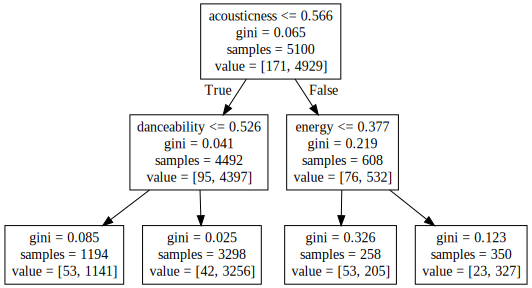

In [166]:
graphviz.Source(tree_dot)